In [16]:
import yaml
import pandas as pd
from utils.data_preprocessor import DataPreprocessor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "5min"

training_file_path: str = f"../data/indicators ({interval})/AAPL_indicators.csv"
validation_file_path: str = f"../data/indicators ({interval})/TSLA_indicators.csv"

training_df = pd.read_csv(training_file_path)
validation_df = pd.read_csv(validation_file_path)

training_preprocessor = DataPreprocessor(training_df)
validation_preprocessor = DataPreprocessor(validation_df)

X_train = training_preprocessor.target_data_batched
y_train = training_preprocessor.target_data_batched_target

X_val = validation_preprocessor.target_data_batched
y_val = validation_preprocessor.target_data_batched_target

X_val = X_val[:-validation_preprocessor.trend_length]
y_val = y_val[:-validation_preprocessor.trend_length]

X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_val_reshaped = X_val.reshape(-1, X_val.shape[-1])

scaler = StandardScaler()
X_train_scaled_reshaped = scaler.fit_transform(X_train_reshaped)
X_val_scaled_reshaped = scaler.transform(X_val_reshaped)

X_train_scaled = X_train_scaled_reshaped.reshape(X_train.shape)
X_val_scaled = X_val_scaled_reshaped.reshape(X_val.shape)

print("Training Dataset shape:", training_df.shape)
print("Validation Dataset shape:", validation_df.shape)
print("Training sets shape:", X_train.shape, y_train.shape)
print("Validation sets shape:", X_val.shape, y_val.shape)


Training Dataset shape: (5000, 13)
Validation Dataset shape: (5000, 13)
Training sets shape: (4958, 30, 30) (4958,)
Validation sets shape: (4946, 30, 30) (4946,)


In [17]:
from models.stock_trend_lstm_model import StockTrendLSTMModel

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])
epochs: int = config["data"]["epochs"]
batch_size: int = config["data"]["batch_size"]
my_model = StockTrendLSTMModel(input_shape, X_train_scaled, y_train, X_val_scaled, y_val, epochs, batch_size)
history = my_model.train()

Epoch 1/15
2479/2479 [==============================] - 22s 8ms/step - loss: 0.5056 - accuracy: 0.7916 - val_loss: 0.6103 - val_accuracy: 0.5873
Epoch 2/15
2479/2479 [==============================] - 20s 8ms/step - loss: 0.2904 - accuracy: 0.8907 - val_loss: 0.4850 - val_accuracy: 0.7254
Epoch 3/15
2479/2479 [==============================] - 20s 8ms/step - loss: 0.1570 - accuracy: 0.9484 - val_loss: 0.2966 - val_accuracy: 0.8898
Epoch 4/15
2479/2479 [==============================] - 20s 8ms/step - loss: 0.0507 - accuracy: 0.9974 - val_loss: 0.1590 - val_accuracy: 0.9709
Epoch 5/15
2479/2479 [==============================] - 20s 8ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 0.9856
Epoch 6/15
2479/2479 [==============================] - 20s 8ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9949
Epoch 7/15
2479/2479 [==============================] - 20s 8ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0315 - val_ac

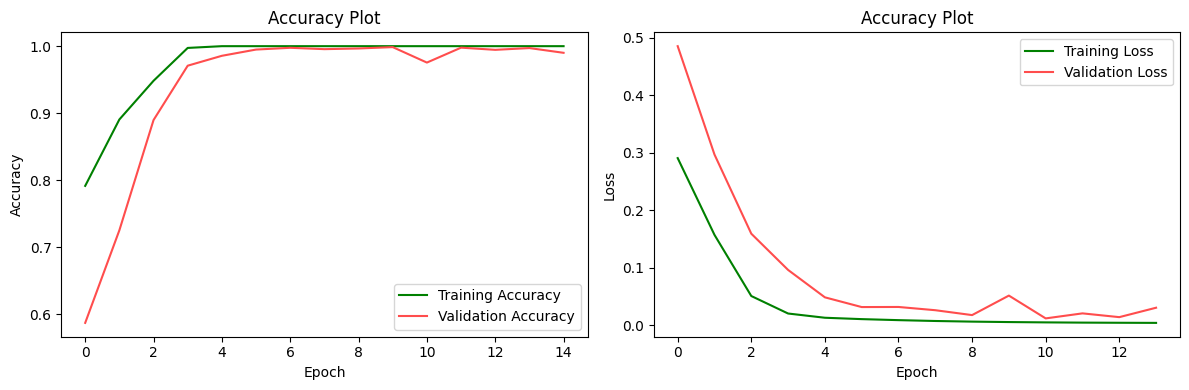

In [18]:
from utils.visualizing_service import plot_model_accuracy
plot_model_accuracy(history)